## Classification practical


In [1]:
from keras.datasets import mnist
import numpy as np
np.random.seed(1337)
import pandas
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from keras.utils import np_utils

## Load the dataset

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

## View the shape

In [4]:
print('Training data shape : ', X_train.shape, Y_train.shape)
print('Testing data shape : ', X_test.shape, Y_test.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


## Find the unique numbers from the train labels

In [5]:
classes = np.unique(Y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


## Plot some of the data

Text(0.5, 1.0, 'Ground Truth : 7')

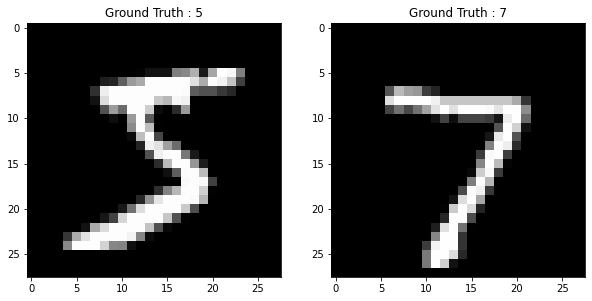

In [6]:
plt.figure(figsize=[10,5])
 
# Display the first image in training data
plt.subplot(121)
plt.imshow(X_train[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(Y_train[0]))
 
# Display the first image in testing data
plt.subplot(122)
plt.imshow(X_test[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(Y_test[0]))

## Flatten the data

In this notebook we won't be making use of the data as "images" but rather as long vectors of length 784

## This is what an example in the dataset looks like

In [7]:
X_train[0].shape

(28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

## Task: Convert from image shape to a vector shape

We go from 28x28 pixel sized images to a vector of length 784.

We would like to reshape the training data from shape (60000, 28, 28) to (60000,784). To do this, we can make use of Numpy's *reshape* function. 

Hint: ...reshape(...).astype('float32')

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
num_pixels = X_train.shape[1] * X_train.shape[2]

In [11]:
X_train = np.reshape(X_train, (60000,784))
X_test = np.reshape(X_test, (10000,784))

## Now the data is a long vector

There are 60,000 examples for which each is a vector of length 784

In [12]:
X_train.shape

(60000, 784)

## View the first example

In [13]:
X_train[0].shape

(784,)

In [14]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

## Task: Normalise

We need to normalise the data since the values range from 0 to 255. Training NNs on data ranging between [0,1] can be easier. To do this, we simply divide by the maximum value, in this case 255.

In [15]:
X_train = X_train =(X_train)/255 # Your code here
X_test = (X_test)/255# Your code here

## One hot encoding

We're going to want our labels as one-hot vectors, which are vectors that holds mostly 0's and one 1. It's easiest to see this in a example. As a one-hot vector, the number 0 is represented as [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], and 4 is represented as [0, 0, 0, 0, 1, 0, 0, 0, 0, 0].

One-hot encoded vectors allow us to map each category in our set of labels to a vector where only a single value is 1.

0 maps to [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

1 maps to [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

2 maps to [0, 0, 2, 0, 0, 0, 0, 0, 0, 0]

Notes on one-hot encoding: https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

## Before

In [16]:
Y_test[0]

7

## Task: Convert from categorical labels to one-hot encoded vectors

In this case there are 10 classes so we can tell the function to convert into a vector of length 10. You need to convert both the training targets and the testing targets.

In [17]:
Y_train=np_utils.to_categorical(Y_train,num_classes=10)# Your code here
Y_test=np_utils.to_categorical(Y_test,num_classes=10)

## After

In [18]:
Y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

## Task: Create a neural network model

In [20]:
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.3)# Your code here

In [21]:
# define the model
def baseline():
    # create model
    model = Sequential()
    
    # add one fully connected layer
    model.add(Dense(16, input_dim=784, activation='relu'))
    # add a fully connected layer for the output
    model.add(Dense(16,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    # Compile model
    model.compile(loss="categorical_crossentropy", optimizer='adam',metrics=["accuracy"])
    
    return model

## Task: Initialise the model

In [22]:
model=baseline()

## Task: Determine the number of trainable parameters

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


## Task: Begin training

Fit on the training features and targets. Also make use of the validation data you've set aside above. Set the number of epochs, batch size and also explore various *verbose* values.

In [24]:
X_train.shape

(29400, 784)

In [25]:
Y_train.shape

(29400, 10)

In [26]:
X_test.shape

(10000, 784)

In [27]:
Y_test.shape

(10000, 10)

In [28]:
history=model.fit(X_train,Y_train,validation_data=(X_val,Y_val),epochs=20,batch_size=4,verbose=1)

Epoch 1/20
7350/7350 [==============================] - 16s 2ms/step - loss: 0.4124 - accuracy: 0.8776 - val_loss: 0.2556 - val_accuracy: 0.9240
Epoch 2/20
7350/7350 [==============================] - 15s 2ms/step - loss: 0.2345 - accuracy: 0.9315 - val_loss: 0.2314 - val_accuracy: 0.9302
Epoch 3/20
7350/7350 [==============================] - 15s 2ms/step - loss: 0.1964 - accuracy: 0.9413 - val_loss: 0.2088 - val_accuracy: 0.9390
Epoch 4/20
7350/7350 [==============================] - 17s 2ms/step - loss: 0.1749 - accuracy: 0.9478 - val_loss: 0.1967 - val_accuracy: 0.9429
Epoch 5/20
7350/7350 [==============================] - 15s 2ms/step - loss: 0.1574 - accuracy: 0.9527 - val_loss: 0.2220 - val_accuracy: 0.9347
Epoch 6/20
7350/7350 [==============================] - 15s 2ms/step - loss: 0.1508 - accuracy: 0.9545 - val_loss: 0.2016 - val_accuracy: 0.9408
Epoch 7/20
7350/7350 [==============================] - 15s 2ms/step - loss: 0.1366 - accuracy: 0.9583 - val_loss: 0.1847 - val_ac

## Task: Predict on the test data

In [29]:
prediction=model.predict(X_test)
prediction

array([[4.9974872e-15, 2.9700142e-11, 1.0774140e-06, ..., 9.9999893e-01,
        4.4764441e-09, 2.3029158e-11],
       [6.3479144e-12, 2.0789135e-07, 9.9999928e-01, ..., 2.9106753e-08,
        2.6824909e-10, 4.0059788e-19],
       [6.4984840e-07, 9.9428469e-01, 9.6577482e-05, ..., 7.7210978e-04,
        1.7383465e-04, 1.6530903e-09],
       ...,
       [3.9182917e-14, 3.4729256e-13, 2.9984581e-15, ..., 2.2305084e-09,
        7.4574250e-11, 5.9129741e-07],
       [2.9232821e-17, 1.7736744e-26, 1.7590238e-21, ..., 9.4291437e-14,
        1.2717977e-10, 5.9548059e-15],
       [1.0368815e-13, 6.5644654e-24, 3.3674007e-16, ..., 3.4716221e-21,
        2.3427816e-12, 1.3533579e-16]], dtype=float32)

## Task: Compute the accuracy

In [30]:
prediction_classes=np.argmax(prediction,axis=1)

In [31]:
accuracy_score(np.argmax(Y_test,1),prediction_classes)

0.9463

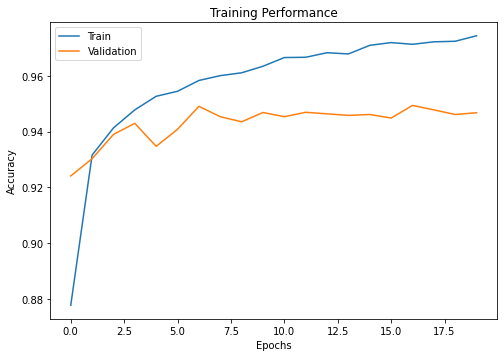

In [34]:
# Here we define the function
def plot_hist(h, xsize=6, ysize=10):
    # we specfy the figure size
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]
    fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True)
   
    
    plt.subplot(211)
    plt.plot(h['accuracy'])
    plt.plot(h['val_accuracy'])
    plt.title('Training Performance')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='best')
   
    plt.draw()
    plt.show()

    return

# plotting
plot_hist(history.history, xsize=8, ysize=12)